In [70]:
# Importing important modules.
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.spatial import Voronoi, Delaunay, voronoi_plot_2d
from scipy.spatial.distance import cdist, pdist, squareform
import networkx as nx
from scipy.spatial import distance
from matplotlib.lines import Line2D

# Setting up modules for this notebook.

np.random.seed(200)


In [49]:
# Manually generating the simple dataset x

xData = np.array([[0,0], [1,1], [1.125,2], [0.25,3], [-0.875,2], [-1,1], [1,-1], [0.875,-2], [-0.25,-3], [-1.125,-2], [-1,-1]]) + np.random.randn(11,2)/20

# Generating the complex dataset y

yData = np.random.rand(1000,2)

yData = yData[((yData[:,0] < 0.55) | (yData[:,0] > 0.9) |  (yData[:,1] < 0.55) | (yData[:,1] > 0.9)) & ((yData[:,0] < 0.1) | (yData[:,0] > 0.45) |  (yData[:,1] < 0.1) | (yData[:,1] > 0.45))]


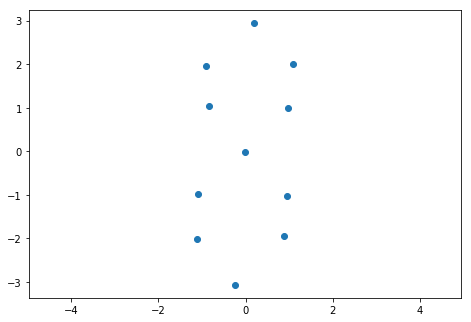

In [39]:
# Plotting X

fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.axis('equal')

axes.scatter(xData[:,0], xData[:,1])

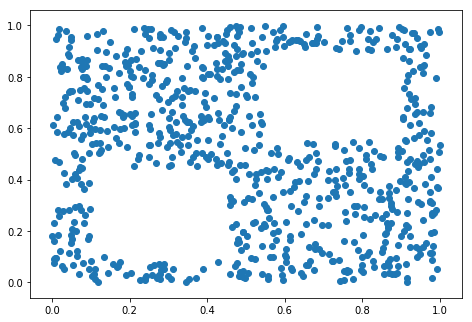

In [40]:
#Plotting Y

fig = plt.figure()
axes = fig.add_axes([0,0,1,1])

axes.scatter(yData[:,0], yData[:,1])

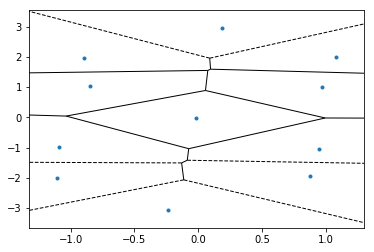

In [41]:
# Voronoi Diagram for X

vor1 = Voronoi(xData)
vorplot1 = voronoi_plot_2d(vor1, show_vertices=False)

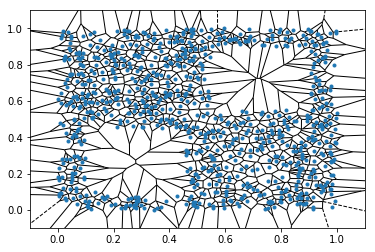

In [42]:
# Voronoi Diagram for Y

vor2 = Voronoi(yData)
vorplot2 = voronoi_plot_2d(vor2, show_vertices=False)

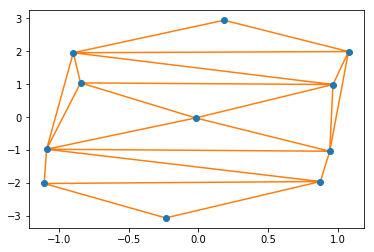

In [43]:
# Delaunay diagram for X

del1 = Delaunay(xData)
plt.plot(xData[:,0], xData[:,1], 'o')
plt.triplot(xData[:,0], xData[:,1], del1.simplices.copy())
plt.show()

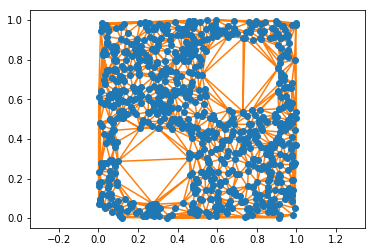

In [44]:
#Delunay Diagram for Y

del2 = Delaunay(yData)
plt.plot(yData[:,0], yData[:,1], 'o')
plt.triplot(yData[:,0], yData[:,1], del2.simplices.copy())
plt.axis("equal")
plt.show()

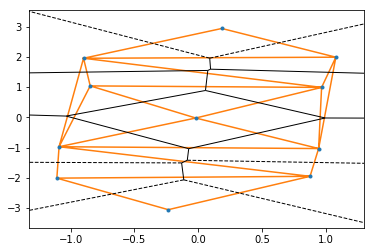

In [45]:
voronoi_plot_2d(vor1, show_vertices=False)
plt.triplot(xData[:,0], xData[:,1], del1.simplices.copy())

plt.show()

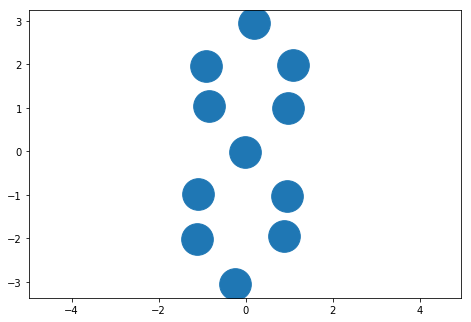

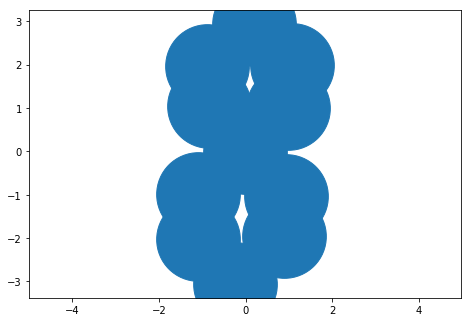

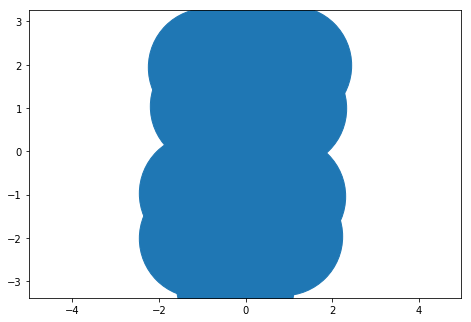

In [46]:
threshholds = [1000,7000,14000]

for i in threshholds:
    fig = plt.figure()
    axes = fig.add_axes([0,0,1,1])
    axes.axis("equal")

    axes.scatter(xData[:,0], xData[:,1], s=i)

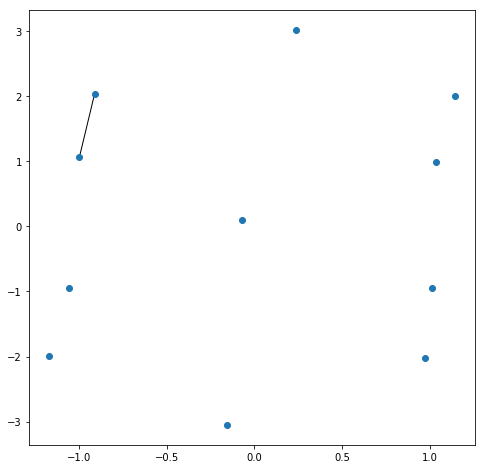

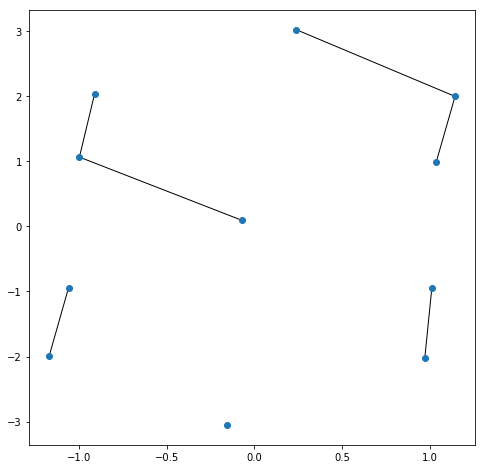

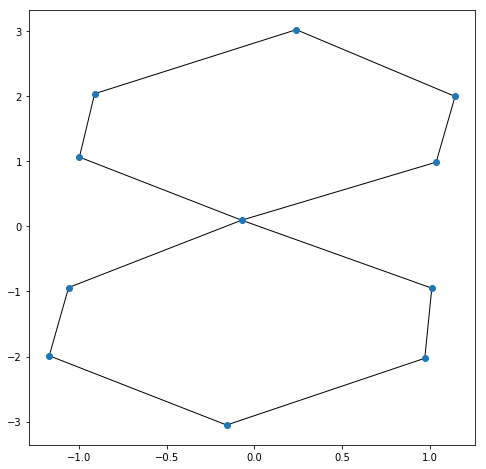

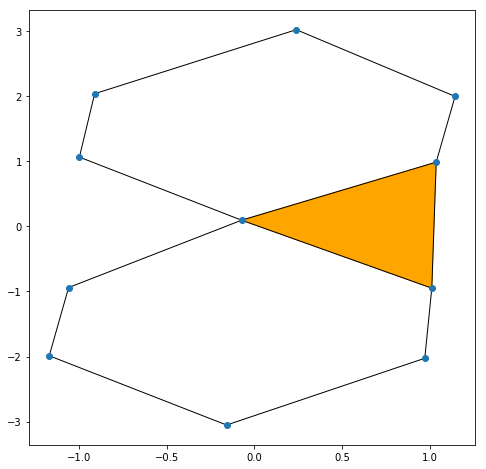

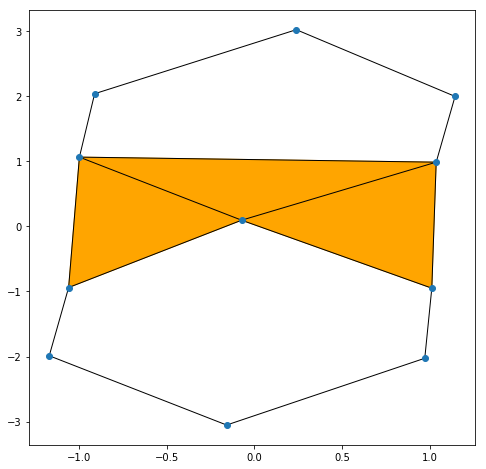

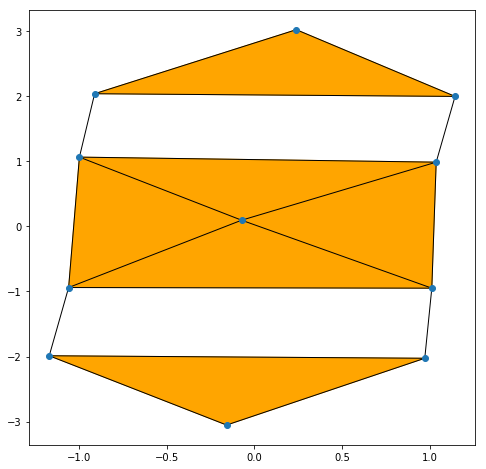

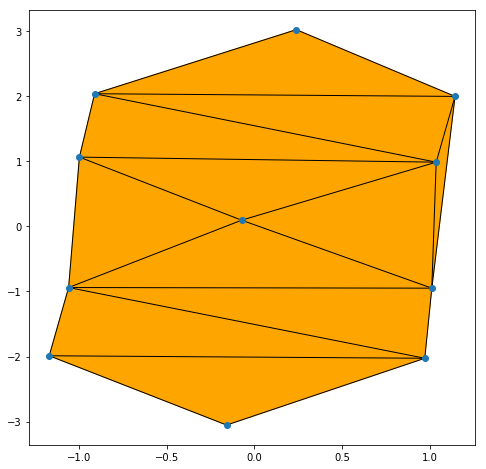

In [68]:
# Code taken from TDA seminar during MIF seminars. Not mine!

from collections import defaultdict
import itertools

def get_voronoi_neighbours(points):
    # calculate a Delaunay triangluation, in order to get
    # a list of all edges and triangles incident to every vertex
    tri = Delaunay(points)
    edgeList=defaultdict(set)
    triList = defaultdict(set)

    for face in tri.simplices:
         
        for i in face:
            triList[i].add(frozenset(face))

        for u,v in itertools.combinations(face,2):
            edgeList[u].add(v)
            edgeList[v].add(u)
            
    return squareform(pdist(points)), tri, edgeList, triList

def draw_complex(simplex, tri):
    
    # create Axes
    fig, ax = plt.subplots(1, figsize=(8, 8))

    # plot all triangles
    for triangle in simplex[2]:
        t = plt.Polygon(tri.points[list(triangle)], color='orange')
        ax.add_patch(t)

    # plot all edges
    for edge in simplex[1]:
        u, v = tri.points[list(edge)]
        l = Line2D([u[0], v[0]], [u[1], v[1]],
                    c='black', linewidth=1)
        ax.add_line(l)
        
    # plot all verticies of the simplex
    ax.plot(tri.points[:,0], tri.points[:,1], 'o')
    
    return plt.show()

def getRadius(points):
    
    p1 = points[0]
    p2 = points[1]
    p3 = points[2]
    
    a = distance.euclidean(p1, p3)
    b = distance.euclidean(p2, p3)
    c = distance.euclidean(p1, p2)
    
    radius = (a*b*c)/ math.sqrt((a+b+c)*(a+b-c)*(a+c-b)*(c+b-a))
    
    return radius

def isAcute(points):
    
    p1 = points[0]
    p2 = points[1]
    p3 = points[2]
    
    a = distance.euclidean(p1, p3)
    b = distance.euclidean(p2, p3)
    c = distance.euclidean(p1, p2)
    
    if a*a + b*b <= c*c :
        return 0
    if c*c + b*b <= a*a :
        return 0
    if a*a + c*c <= b*b :
        return 0
    
    return 1

def construct_complex(A, tri, edgeList, triList, alpha):
    
    complx = [set([]), 
               set([]), 
               set([])]
    # the o simple
    complx[0] = list(range(len(tri.points)))
        
    for p in range(len(tri.points)):
        
        for neighbour in edgeList[p]:
            if A[p][neighbour] <= alpha*2:
                complx[1].add(frozenset({p, neighbour}))

        for triangle in triList[p]:
            if getRadius(tri.points[list(triangle)]) <= alpha:
                complx[2].add(frozenset(triangle))
 
        for triangle in triList[p]:
            if isAcute(tri.points[list(triangle)]) == 1 :
                break
            # below we check a non-acute triangle
            short_edges = 0
            for u,v in itertools.combinations(triangle,2):
                if A[u][v] <= alpha*2:
                    short_edges = short_edges + 1    
            if short_edges == 3 :
                complx[2].add(frozenset(triangle))
                
    return complx


dist_matrix, tri, edgeList, triList = get_voronoi_neighbours(xData)

for alpha in [0.5, 0.7, 0.8, 1, 1.02, 1.1,1.5]:
    s = construct_complex(dist_matrix, tri, edgeList, triList, alpha)
    draw_complex(s,tri)

In [ ]:
# Code for persistence diagrams can be found in the other ipynb file - I couldn't get some libraries working on my pc so I changed to google's colab notebooks.